In [2]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, tpe
from scipy.linalg import expm
from qibo import hamiltonians, set_backend, Circuit
from qibo.symbols import *

import qibo
from qibo.transpiler.unitary_decompositions import two_qubit_decomposition
qibo.set_backend("numpy")
backend = qibo.backends.NumpyBackend()
np.set_printoptions(precision=3, suppress=True)

/home/marek/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[Qibo 0.2.19|INFO|2025-07-16 14:34:24]: Using numpy backend on /CPU:0


In [3]:
import qibo
import qibo_client
import utils_tokens


# authenticate to server through the client instance
client = qibo_client.Client(utils_tokens.load_api_token())

# run the circuit
device = "sinq20"
project = "personal"

API token loaded from 'nqch_API_token.pickle'.


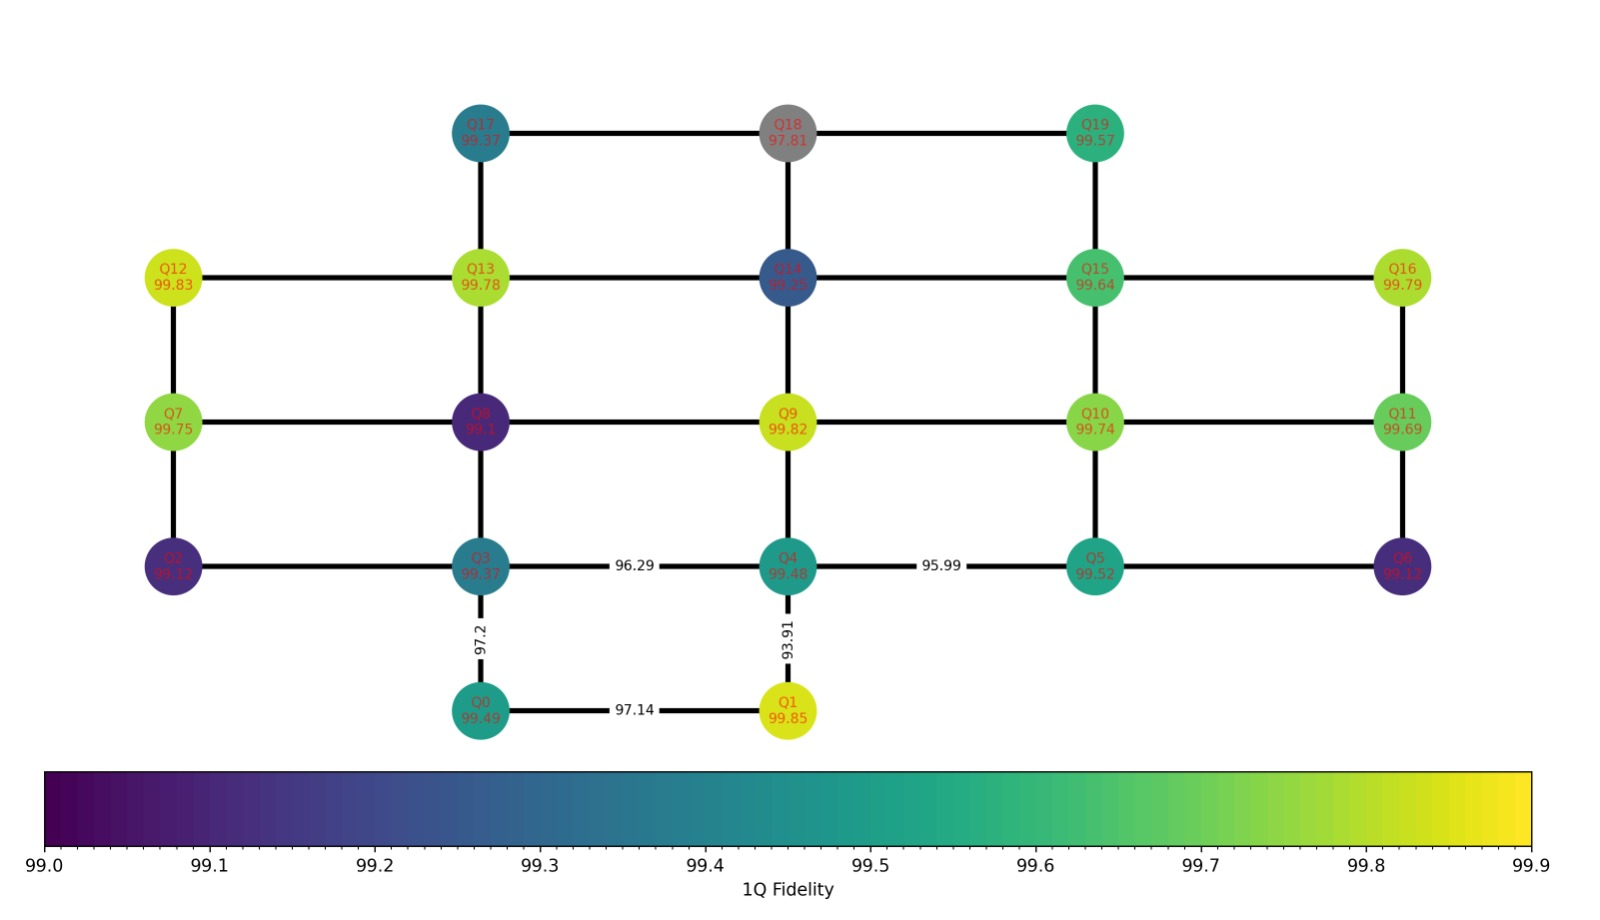

In [4]:
delta = 0.5
t = 0.35
steps =1
circuit = Circuit(4)
circuit.add(gates.RX(0,3.14))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,0))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.M(0,1,2,3))
circuit.draw()

# Define the number of measurement shots
nshots = 1000

# Execute the circuit with the specified number of shots
result = circuit.execute(nshots=nshots)

# Get the measurement frequencies (counts for each bitstring)
# The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
frequencies = result.frequencies()

# Print the frequencies
print(f"Measurement outcomes after {nshots} shots:")
print("Frequencies (counts per bitstring):", frequencies)

0: ─RX─o─X─o─M─
1: ────X─o─X─M─
2: ──────────M─
3: ──────────M─
Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'0100': 1000})


In [5]:
circuit_QPU= Circuit(20)
#Currently the CZs are calibrated for 3-8, 8-13 and 13-17
q0 = 5
q1 = 4
q2 = 3
q3 = 0
q4 = 1
circuit_QPU.add(circuit.on_qubits(q0,q1,q2,q3))

job = client.run_circuit(circuit_QPU, device=device, project=project, nshots=400)
result = job.result()
print(result)
result.frequencies()

[2025-07-16 14:34:54,141] INFO: Post new circuit on the server
[2025-07-16 14:34:55,165] INFO: Job posted on server with pid 84a669e6cd564a62ad8cb1a007550b60
[2025-07-16 14:34:55,878] INFO: Please wait until your job is completed...


Counter({'0100': 358,
         '0000': 15,
         '1000': 12,
         '1100': 11,
         '1001': 2,
         '0010': 1,
         '1101': 1})

In [6]:
delta = 0.5
t = 0.35
steps =1
circuit = Circuit(4)
circuit.add(gates.RX(0,3.14))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,0))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.CNOT(2,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.M(0,1,2,3))
circuit.draw()

# Define the number of measurement shots
nshots = 1000

# Execute the circuit with the specified number of shots
result = circuit.execute(nshots=nshots)

# Get the measurement frequencies (counts for each bitstring)
# The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
frequencies = result.frequencies()

# Print the frequencies
print(f"Measurement outcomes after {nshots} shots:")
print("Frequencies (counts per bitstring):", frequencies)

0: ─RX─o─X─o───────M─
1: ────X─o─X─o─X─o─M─
2: ──────────X─o─X─M─
3: ────────────────M─
Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'0010': 1000})


In [7]:
circuit_QPU= Circuit(20)

circuit_QPU.add(circuit.on_qubits(q0,q1,q2,q3))

job = client.run_circuit(circuit_QPU, device=device, project=project, nshots=1000)
result = job.result()
print(result)
result.frequencies()

[2025-07-16 14:35:34,282] INFO: Post new circuit on the server
[2025-07-16 14:35:35,306] INFO: Job posted on server with pid 74791cbb4f8b455e8646c80208f2c51b
[2025-07-16 14:35:36,125] INFO: Please wait until your job is completed...


Counter({'0010': 831,
         '0110': 52,
         '0000': 44,
         '1010': 21,
         '0100': 15,
         '1000': 12,
         '1011': 11,
         '0011': 7,
         '1110': 4,
         '0001': 2,
         '1100': 1})

In [9]:
delta = 0.5
t = 0.35
steps =1
circuit = Circuit(4)
circuit.add(gates.RX(0,3.14))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,0))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.CNOT(2,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.CNOT(2,3))
circuit.add(gates.CNOT(3,2))
circuit.add(gates.CNOT(2,3))
circuit.add(gates.M(0,1,2,3))
circuit.draw()

# Define the number of measurement shots
nshots = 1000

# Execute the circuit with the specified number of shots
result = circuit.execute(nshots=nshots)

# Get the measurement frequencies (counts for each bitstring)
# The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
frequencies = result.frequencies()

# Print the frequencies
print(f"Measurement outcomes after {nshots} shots:")
print("Frequencies (counts per bitstring):", frequencies)

0: ─RX─o─X─o─────────────M─
1: ────X─o─X─o─X─o───────M─
2: ──────────X─o─X─o─X─o─M─
3: ────────────────X─o─X─M─
Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'0001': 1000})


In [10]:
circuit_QPU= Circuit(20)
circuit_QPU.add(circuit.on_qubits(q0,q1,q2,q3))

job = client.run_circuit(circuit_QPU, device=device, project=project, nshots=1000)
result = job.result()
print(result)
result.frequencies()

[2025-07-16 14:36:30,605] INFO: Post new circuit on the server
[2025-07-16 14:36:31,729] INFO: Job posted on server with pid 415fc93d644340f896cd691d012f4b91
[2025-07-16 14:36:32,551] INFO: Please wait until your job is completed...


Counter({'0001': 725,
         '0000': 77,
         '0101': 50,
         '0011': 39,
         '1001': 28,
         '0100': 24,
         '0010': 21,
         '1000': 14,
         '0110': 5,
         '0111': 5,
         '1011': 5,
         '1010': 3,
         '1101': 3,
         '1100': 1})

In [13]:
delta = 0.5
t = 0.35
steps =1
circuit = Circuit(5)
circuit.add(gates.RX(0,3.14))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,0))
circuit.add(gates.CNOT(0,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.CNOT(2,1))
circuit.add(gates.CNOT(1,2))
circuit.add(gates.CNOT(2,3))
circuit.add(gates.CNOT(3,2))
circuit.add(gates.CNOT(2,3))
circuit.add(gates.CNOT(3,4))
circuit.add(gates.CNOT(4,3))
circuit.add(gates.CNOT(3,4))
circuit.add(gates.M(0,1,2,3,4))
circuit.draw()

# Define the number of measurement shots
nshots = 1000

# Execute the circuit with the specified number of shots
result = circuit.execute(nshots=nshots)

# Get the measurement frequencies (counts for each bitstring)
# The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
frequencies = result.frequencies()

# Print the frequencies
print(f"Measurement outcomes after {nshots} shots:")
print("Frequencies (counts per bitstring):", frequencies)

0: ─RX─o─X─o───────────────────M─
1: ────X─o─X─o─X─o─────────────M─
2: ──────────X─o─X─o─X─o───────M─
3: ────────────────X─o─X─o─X─o─M─
4: ──────────────────────X─o─X─M─
Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'00001': 1000})


In [14]:
circuit_QPU= Circuit(20)
circuit_QPU.add(circuit.on_qubits(q0,q1,q2,q3,q4))

job = client.run_circuit(circuit_QPU, device=device, project=project, nshots=1000)
result = job.result()
print(result)
result.frequencies()

[2025-07-16 14:37:40,031] INFO: Post new circuit on the server
[2025-07-16 14:37:41,159] INFO: Job posted on server with pid 5695d68269e94c2c8a35ed32fc1531bb
[2025-07-16 14:37:41,883] INFO: Please wait until your job is completed...


Counter({'00001': 560,
         '00011': 144,
         '00000': 70,
         '00010': 36,
         '00101': 34,
         '01001': 28,
         '10001': 21,
         '00100': 18,
         '01011': 15,
         '10011': 13,
         '01000': 12,
         '00111': 8,
         '10000': 7,
         '10010': 6,
         '00110': 5,
         '11001': 4,
         '01010': 3,
         '01101': 3,
         '11010': 3,
         '01100': 2,
         '10100': 2,
         '01110': 1,
         '01111': 1,
         '10101': 1,
         '10110': 1,
         '10111': 1,
         '11100': 1})